<h1>Image Processing and Handling WS 2018/19</h1>

Exercise instructor: Marko Jovanović, mjovanovic@mi.rwth-aachen.de

<strong style="color: red">Notice: </strong>Attendance to <strong>all</strong> exercises sessions <strong>is mandatory</strong>. However, submitted exercise solutions aren't graded nor they present a prerequiste for the exam, but you will receive feedback on your submitted solutions.

The exercise sessions are held from 12.30-14.00 on the following dates at COMA 1:

22.10.2018 - OpenCV and Python intro (this session)<br />
05.11.2018 - Image Enhancement<br />
<strong>19.11.2018 - Fourier Transform</strong><br />
03.12.2018 - Visualization<br />
17.12.2018 - Automation<br />
14.01.2019 - Low-level Image Segmentation<br />
21.01.2019 - High-level Image Segmentation<br />
28.01.2019 - Solving a Problem<br />

The topics are an orientation and subject to change, in accordance with the lectures.

<h2>Exercise 3: Fourier Transform</h2>

Due date: <strong>26.11.2018</strong>

<h3>List of Tasks</h3>
<ul>
    <li><a href="#Task-1">Task 1: Removal of periodic artifacts</a></li>
    <li><a href="#Task-2">Task 2: Fourier-Based Filtering</a></li>
    <li><a href="#Task-3">Task 3: Relevance of the Phase</a></li>
</ul>

<h3>Fourier Transform</h3>

The Fourier transform is widely used in signal processing, and, in particular, in image processing. Its application in image processing include image manipulation, frequency analysis, image enhancement and image compression. During the lecture, you have seen how the Fourier Transform (FT) can be applied to an image in order to decompose it into its frequency components. Thus, FT transforms the image from its spatial domain to its frequency domain. Thus, any function may be approximated exactly with the sum of infinite sine and cosine functions.

Since images can be thought of <strong>discrete</strong> functions of pixel coordinates, mapping the pixel coordinate value to an intensity or color value, the <em>discrete Fourier transform</em> (DFT) can be applied for frequency analysis.

Mathematically, a two-dimensional FT of an image is:

$$ F(k,l) = \sum^{N-1}_{i=0}\sum^{N-1}_{j=0}f(i,j)e^{-i2\pi({ki\over N}+{lj\over N})}$$

Here, $f$ is the image function in the spatial domain, and F the corresponding image function in the frequency domain. Note that F is a complex function, thus it is possible to either display it via a real and complex image or via a magnitude and phase image.

The DFT converts a finite sequence of equally-spaced samples of a function into a same-length sequence of equally-spaced samples of the discrete-time Fourier transform (DTFT), which is a complex-valued function of frequency. The advantage over the (continuous) Fourier transform is that it deals with a finite amount of data, and is as such computable by machines with numerical algorithms. Dedicated hardware for computing the DFT exist as well. Yet, the calculation of DFT can be time-consuming (with a quadratical runtime in terms of data size). Luckily, the fast Fourier Transform (FFT) algorithm exists, which can efficiently compute the DFT in loglinear time. However, it requires the input data to be a power of two, for instance, images of size 64x64, 128x256, 512x512 pixels etc. Therefore, it is highly recommended in order to achieve maximum performance to pad border values or resize the image to obtain an image size which is the power of 2. Bear that in mind, although for this exercise you won't necessarily need to do that.


<a name="#Task-1"></a>
<h3 style="color: red">Task 1: Removal of periodic artifacts</h3>

The idea behind this exercise is taken from a non-medical field of application: waste water pipe (sewer)
inspections are performed by a robot equipped with a charge-coupled device (CCD) camera that acquires
a 180° fish-eye image axial to the pipe every 5.0 cm. From these images, a cylindrical view is computed
(Figure 2, top left). As it is clearly visible, the flash lightning conditions yield a deterministic artifact,
which is not affecting the reconstructed geometry but the gray scales. Along the pipe, a periodical
pattern is overlaid to the gray scales, and the periodicity is known apriori from the dimensions of the sewer and the imaging parameters.


<strong style="color: red">Programming Task: </strong> 
The Fourier transform represents an image by its frequency components. It is suitable to remove
such artifacts without blurring the images, as it would occur using a low-pass filter approach. So, think
of where to suppress the appropriate components in the Fourier domain and try out selective frequency
filtering for image enhancement.

The whole processing steps and the result are shown in the figre below. Since the periodical structure
to remove is oriented vertically, we need to suppress horizontal areas in the Fourier spectrum. Also, the frequency of the artifact signal is rather low, wherefore the suppressed areas are placed near the origin, which is located in the center of the Fourier spectrum. Regarding the symmetry, which is inherent to digital images, two filter bars were placed.

<img src="figure1.png" />

<strong>Hint:</strong> <a href="https://docs.opencv.org/3.1.0/de/dbc/tutorial_py_fourier_transform.html">Have a look here</a> to get to know NumPy's and OpenCV's functions for Fourier Transform.

(<matplotlib.text.Text at 0x7fc822ca4518>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

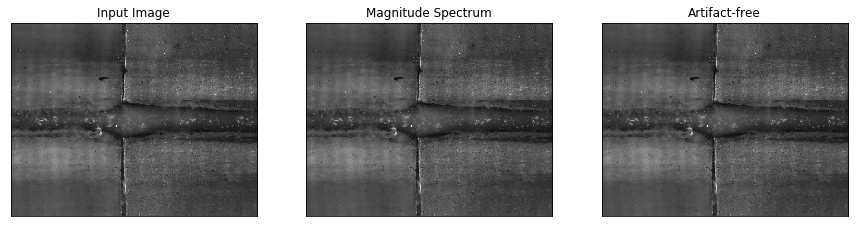

In [6]:
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 15.0)
img = mpimg.imread('sewer.jpg')

# no. of rows, cols in image
rows, cols, depth = img.shape

# center coordinates
crow, ccol = int(rows/2) , int(cols/2)

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = rgb2gray(img)


# YOUR CODE HERE
magnitude_spectrum = img_back = img # enter code as necessary


# END OF YOUR CODE


plt.subplot(131), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_back, cmap = 'gray')
plt.title('Artifact-free'), plt.xticks([]), plt.yticks([])

<strong style="color: red">Further Tasks: </strong> 
<ul>
<li>Stretch the image in x-direction or transpose it (i.e., flip horizontal with vertical directions
(rows and columns) without applying interpolation). Can you guess the new positions of the peaks before
    calculating?</li>
<li>When displaying the Fourier power spectrum, we often observe prominent lines across the
origin in x- and y-directions. In the figure, top right, however, there is no line in vertical direction. What
is the reason for that?</li>
<li>What will happen if only the positive or negative suppression bar is applied, before recon-
structing the image? Place your bet and prove it experimentally.</li>
</ul>

In [4]:
# YOUR CODE HERE

# END OF YOUR CODE

<a name="#Task-2"></a>
<h3 style="color: red">Task 2: Fourier-Based Filtering</h3>

Magnetic resonance imaging (MRI) has become one of the most important medical imaging technologies.
MRI devices use a powerful magnetic field to interact with the magnetic moments of hydrogen atoms in
the tissue, and radio frequency fields to systematically alter the alignment of this magnetization. The
resulting data collected by the scanner lies in the frequency domain, so the inverse Fourier transform is
used to reconstruct the actual image from the measured data. Hence, before the inverse Fourier transform
is applied, the data can be preprocessed to improve image quality, e.g., reduce artifacts or stress certain
aspects in the final image. The advantage of Fourier-filtering MRI is that the forward transform is not
required.

In the following, we will use two input images, one containing the magnitude (Figure (a)) of an MRI
scan and the other with its phase (Figure (b)). As you can see, the reconstruction data is acquired
only in the center part of the Fourier domain. Apply alterations on these components to reduce noise or
smooth the reconstructed slice.

<img src="figure2.png" />

<strong style="color: red">Programming Task: </strong> 
Perform the following steps:

<ul>
    <li>Inverse FFT: Load the images <code>Mag_MR_Knee.tif</code> and <code>Phase_MR_Knee.tif</code>, compute the inverse FT and have a look at the reconstructed image</li>
    <li>High-pass filter: <a href="https://docs.opencv.org/3.1.0/de/dbc/tutorial_py_fourier_transform.html" target="_blank">As described here</a>, create a high pass filter and apply it according to the steps that have been described.</li>
</ul>

High-pass filtering always yields an image with prominent changes of the local brightness (which
correspond to high frequencies in the Fourier space) being stressed, so it’s similar to an edge detection
filter (Figure (b)). A low-pass filter, on the other hand, cuts out the high frequencies, which results in
a blurred image (Figure (c)).

<img src="figure3.png" />

In [ ]:
# YOUR CODE here

<strong style="color: red">Further Tasks: </strong> 
<ul>
<li>Magnitude and phase of the MRI image have a size of 512x512 pixels. Cut out (crop) a sub-image of dimensions 256x256, reconstruct the spatial domain, and resize the image to 512x512 pixels. What is the difference to the image displayed previously, and why is that? To emphasize the differences, you might wish to apply image subtraction.</li>
<li>What happens if you shrink magnitude and phase instead of cropping?</li>
</ul>

In [ ]:
# YOUR CODE here

<a name="#Task-3"></a>
<h3 style="color: red">Task 3: Relevance of the Phase</h3>

We now want to assess the influence of magnitude and phase experimentally. The idea is to use two
similar but different images and switch their components in the Fourier domain.

<strong style="color: red">Programming Task: </strong> 
Perform the following steps:

<ul>
    <li>Process the first image <code>kohl.png</code>. Compute its magnitude and phase of the FT and visualize the results.</li>
    <li>Process the second image <code>merkel.png</code> the same way.</li>
    <li>Re-assign magnitude and phase of the two images</li>
    <li>Compute the inverse FT</li>
    <li>Repeat for the other combination (Kohl's magnitude and Merkel's phase vs. Merkel's magnitude and Kohl's phase)</li>
</ul>

The result should be similar to the following:

<img src="figure4.png" />

It is worth mention that obviously, the phase has a larger impact to the reconstruction as the magnitude does have, because we can recognize the persons of the phase components, rather than the magnitudes.

In [ ]:
# YOUR CODE HERE

<strong style="color: red">Further Tasks: </strong> 
<ul>
<li>Why do we have prominent horizontally orientated lines but a rather diagonally overlaid
structure appearing in Figure (a) and (b), respectively? (to answer this question, compare the view-
optimized files of the magnitudes).</li>
<li>Use photographs of you and your friend instead of Merkel and Kohl. Will this work similarly?</li>
<li>Use standard functions to create constant images or random noise, and combine magnitude and phase with these artificially generated images. Can you recognize the original image if the phase signal is substituted by noise?</li>
</ul>

In [ ]:
# YOUR CODE HERE